In [40]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv('results.csv')
df.head()

,name,missing_values,mv_percentage,imputer_method,outlier_method,normalization_method,classification_method,knn_neighbors,mlp_activation,mlp_first_layer,mlp_second_layer,mlp_max_iter,mlp_learning_rate,mlp_learning_rate_init,mlp_tol,accuracy,precision,recall,f1
0,Experimento1,True,5,knn,3sigma,minmax,knn,10,-1,-1,-1,-1,-1,-1.0,-1.0,0.919478,0.933589,0.928155,0.930557
1,Experimento1,True,5,knn,3sigma,minmax,knn,10,-1,-1,-1,-1,-1,-1.0,-1.0,0.917053,0.932006,0.926285,0.928801
2,Experimento1,True,5,knn,3sigma,minmax,knn,10,-1,-1,-1,-1,-1,-1.0,-1.0,0.918009,0.932701,0.927348,0.929671
3,Experimento1,True,5,knn,3sigma,minmax,knn,10,-1,-1,-1,-1,-1,-1.0,-1.0,0.918523,0.933377,0.927920,0.930338
4,Experimento1,True,5,knn,3sigma,minmax,knn,10,-1,-1,-1,-1,-1,-1.0,-1.0,0.919698,0.934206,0.929244,0.931459


In [86]:
columns_to_convert = ['accuracy', 'precision', 'recall', 'f1']

df[columns_to_convert] = (df[columns_to_convert] * 100).round(2)
df.head()

,name,missing_values,mv_percentage,imputer_method,outlier_method,normalization_method,classification_method,knn_neighbors,mlp_activation,mlp_first_layer,mlp_second_layer,mlp_max_iter,mlp_learning_rate,mlp_learning_rate_init,mlp_tol,accuracy,precision,recall,f1
0,Experimento1,True,5,knn,3sigma,minmax,knn,10,-1,-1,-1,-1,-1,-1.0,-1.0,91.95,93.36,92.82,93.06
1,Experimento1,True,5,knn,3sigma,minmax,knn,10,-1,-1,-1,-1,-1,-1.0,-1.0,91.71,93.20,92.63,92.88
2,Experimento1,True,5,knn,3sigma,minmax,knn,10,-1,-1,-1,-1,-1,-1.0,-1.0,91.80,93.27,92.73,92.97
3,Experimento1,True,5,knn,3sigma,minmax,knn,10,-1,-1,-1,-1,-1,-1.0,-1.0,91.85,93.34,92.79,93.03
4,Experimento1,True,5,knn,3sigma,minmax,knn,10,-1,-1,-1,-1,-1,-1.0,-1.0,91.97,93.42,92.92,93.15


[]

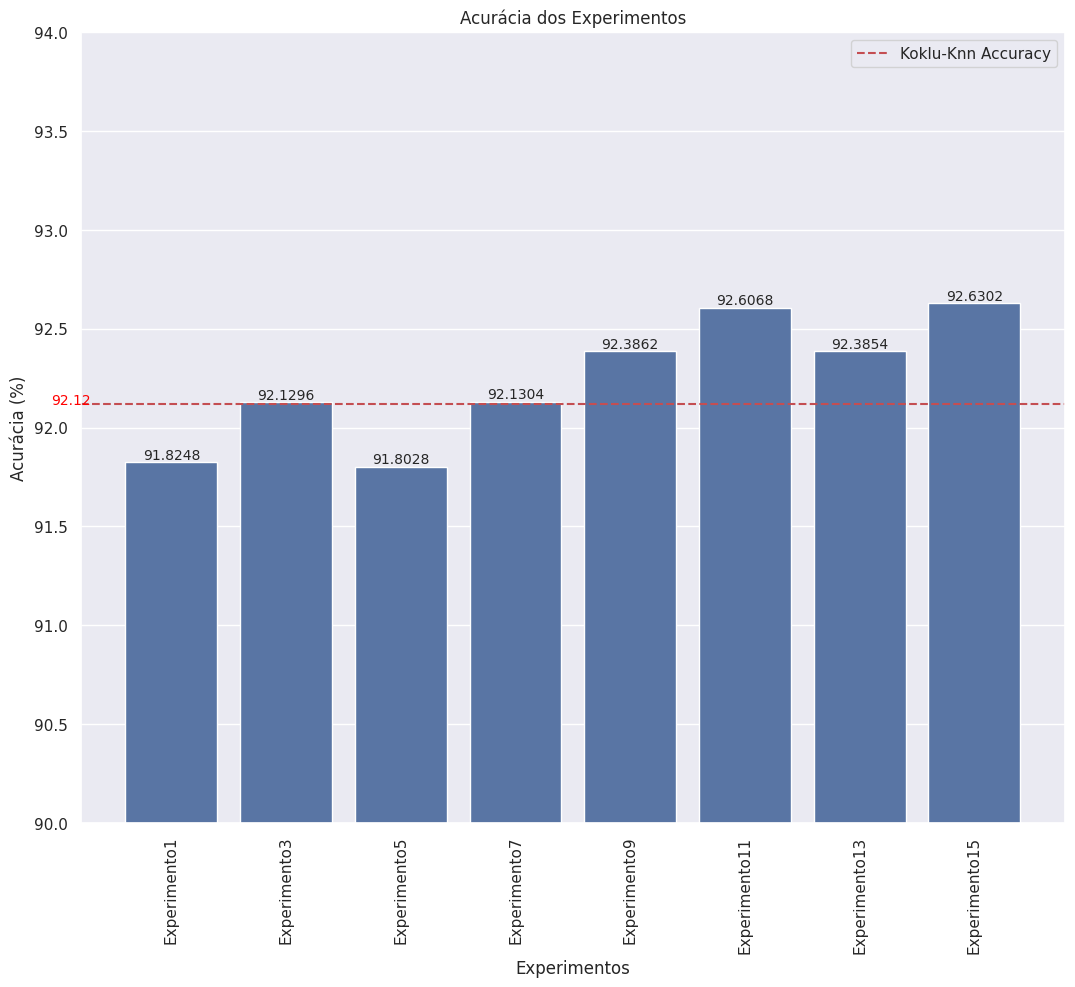

In [91]:
df_knn = df[(df['classification_method'] == 'knn') & (df['name'] != 'Koklu-Knn')]


# Add horizontal line for Koklu-Knn accuracy
koklu_knn_accuracy = df[df['name'] == 'Koklu-Knn']['accuracy'].values[0]
plt.axhline(y=koklu_knn_accuracy, color='r', linestyle='--', label='Koklu-Knn Accuracy')
plt.text(-0.7, koklu_knn_accuracy, str(koklu_knn_accuracy), color='Red', ha='right', fontsize=10)
ax = sns.barplot(df, y=df_knn["accuracy"], x=df_knn.name, errorbar=None)

plt.xticks(rotation=90)
plt.title("Acurácia dos Experimentos")
plt.ylabel("Acurácia (%)")
plt.xlabel("Experimentos")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set(ylim=(90, 94))
ax.plot()

[(80.0, 95.0)]

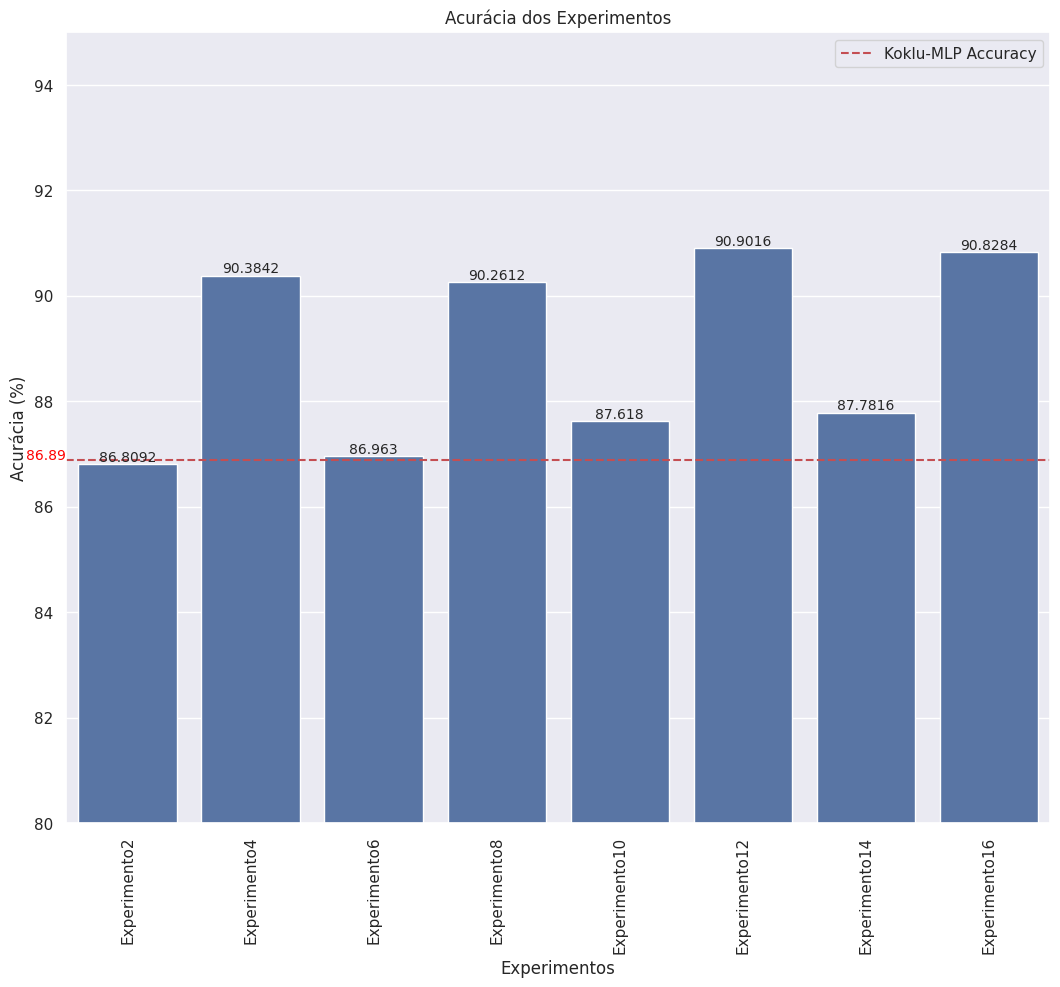

In [70]:
df_mlp = df[(df['classification_method'] == 'mlp') & (df['name'] != 'Koklu-Mlp')]
# Add horizontal line for Koklu-MLP accuracy
koklu_mlp_accuracy = df[df['name'] == 'Koklu-Mlp']['accuracy'].values[0]
plt.axhline(y=koklu_mlp_accuracy, color='r', linestyle='--', label='Koklu-MLP Accuracy')
plt.text(-0.5, koklu_mlp_accuracy, str(koklu_mlp_accuracy), color='Red', ha='right', fontsize=10)
ax = sns.barplot(df, y=df_mlp["accuracy"], x=df_mlp.name, errorbar=None)
plt.xticks(rotation=90)
plt.title("Acurácia dos Experimentos")
plt.ylabel("Acurácia (%)")
plt.xlabel("Experimentos")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set(ylim=(80, 95))
